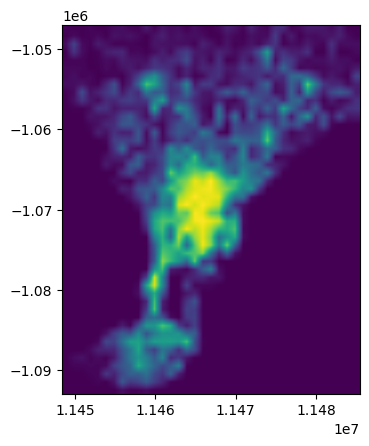

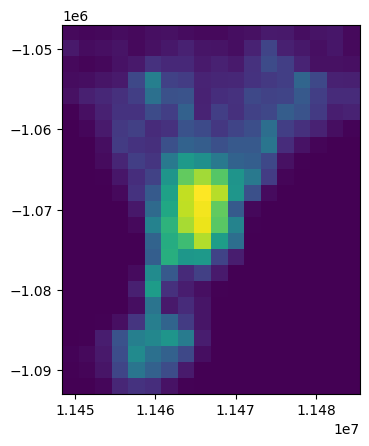

In [3]:
import rasterio
from rasterio.enums import Resampling
import rasterio.plot as rplot
import matplotlib.pyplot as plt

# up sampling
def up_sample(input_file, output_file, scale_factor=200):
    with rasterio.open(input_file) as src:
        new_width = src.width * scale_factor
        new_height = src.height * scale_factor

        data = src.read(
            out_shape=(src.count, int(new_height), int(new_width)),
            resampling=Resampling.bilinear
        )

        transform = src.transform * src.transform.scale(
            (src.width / new_width),
            (src.height / new_height) 
        )

        with rasterio.open(
            output_file,
            'w',
            driver='GTiff',
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform,
        ) as dst:
            dst.write(data)
    # plot the output
    with rasterio.open(output_file) as src:
        rplot.show(src)
        plt.show()

# down sampling
def down_sample(input_file, output_file, scale_factor=0.5):
    with rasterio.open(input_file) as src:
        new_width = int(src.width * scale_factor)
        new_height = int(src.height * scale_factor)

        data = src.read(
            out_shape=(src.count, new_height, new_width),
            resampling=Resampling.bilinear
        )

        transform = src.transform * src.transform.scale(
            (src.width / new_width),
            (src.height / new_height) 
        )

        with rasterio.open(
            output_file,
            'w',
            driver='GTiff',
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform,
        ) as dst:
            dst.write(data)
    # plot the output
    with rasterio.open(output_file) as src:
        rplot.show(src)
        plt.show()

input_file = 'built_up_denpasar.tif'
output_file = 'built_up_denpasar_upsampled.tif'
up_sample(input_file, output_file)

input_file = 'built_up_denpasar.tif'
output_file = 'built_up_denpasar_downsampled.tif'
down_sample(input_file, output_file)